## Practical Session (Deep Learning for Image Analysis / Master IASD)
### Santiago VELASCO-FORERO
email: Santiago.Velasco@Mines-Paristech.fr


In this practical session you have to effectively train a network for the Fashion MNIST database, with a limited number of 4000 training images.  
A proposed network does not learn, and you must modify it and compare the models.

In [1]:
import tensorflow as tf
import tensorflow.keras.models as km
import tensorflow.keras.layers as kl
#import morpholayers.layers as ml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import top_k_accuracy_score
plt.gray()

<Figure size 432x288 with 0 Axes>

### Training parameters of Training
(For this homework, you do NOT need to change the following parameters)

In [2]:
TRAINING_SAMPLES=4000
EPOCHS=64
BATCH_SIZE=64
PATIENCE_ES=10 #Patience for Early Stopping
PATIENCE_LR=4 #Patience for ReduceLROnPlateau

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x_validation=x_train[40000::]
y_validation=y_train[40000::]
x_train=x_train[0:TRAINING_SAMPLES]
y_train=y_train[0:TRAINING_SAMPLES]


4422102/4422102 [==============================] - 0s 0us/step


You can use the following function to visualize results

In [4]:
def plot_prediction(model,x,y):
    'Plot some images on x and the predictions of model and the ground truth on y'
    'model is a model (is model=None the prediction is nan)'
    'x is an input data'
    'y correct class'
    Grid_W = 6
    Grid_H = 6
    if model is None:
        pred=[np.NaN]*(Grid_W*Grid_H)
    else:
        pred=np.argmax(model.predict(x[0:(Grid_W*Grid_H)]),axis=-1)
    fig, axes = plt.subplots(Grid_H, Grid_W, figsize=(20,20))
    axes = axes.ravel()
    for i in np.arange(0, Grid_H*Grid_W):
        axes[i].imshow(x[i].reshape(28,28))
        axes[i].set_title('Predicted = {:0.1f} \n Actual = {:0.1f}'.format(pred[i], 
                                                                       y[i]))
        axes[i].axis('off')
    plt.show()
        
def plot_history(history):
    'Use the history to plot loss and accuracy curves'
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    #plt.yscale('log')
    plt.legend()
    plt.grid('on')
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'],label='acc')
    plt.plot(history.history['val_accuracy'],label='val_acc')
    plt.ylim([0,1])
    plt.legend()
    plt.grid('on')
    plt.show()
    
def report_model(model,x_test,y_test,x_train,y_train):
    'From a model, it computes a confusion_matrix on x_test,y_test'
    'Additionally, the histogram of last layer per class on x_test'
    'and the top-k accuracy score on both x_test and x_train'
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    confusion_mat = confusion_matrix(y_test, np.argmax(y_pred,axis=-1))
    # Visualize confusion matrix
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    ticks = CLASS_NAMES
    plt.xticks(np.arange(len(CLASS_NAMES)), np.arange(len(CLASS_NAMES)))
    plt.yticks(np.arange(len(CLASS_NAMES)), ticks)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()
    
    plt.figure()
    Grid_W = 10
    Grid_H = 1
    fig, axes = plt.subplots(Grid_H, Grid_W, figsize=(20,5))
    axes = axes.ravel()
    for i in np.arange(0, Grid_H*Grid_W):
        axes[i].hist(y_pred[y_test==i,i],density=True)
        axes[i].set_title('Class '+ CLASS_NAMES[i])
        axes[i].axis('off')
    plt.show()
    
    plt.figure()
    res_test=[]
    res_train=[]
    for i in range(1,5):
        res_test.append(top_k_accuracy_score(y_test, y_pred,k=i))
        res_train.append(top_k_accuracy_score(y_train, y_pred_train,k=i))
    plt.plot(range(1,5),res_test,label='test')
    plt.plot(range(1,5),res_train,label='train')
    plt.ylabel('top_k_accuracy_score')
    plt.xlabel('k')
    plt.legend()
    #plt.boxplot(y_pred)
    #plt.xlabel('Class')
    #plt.ylabel('Output of Network')
    #plt.show()
    #print('Accuracy', res[1])

### Useful functions for visualize results.

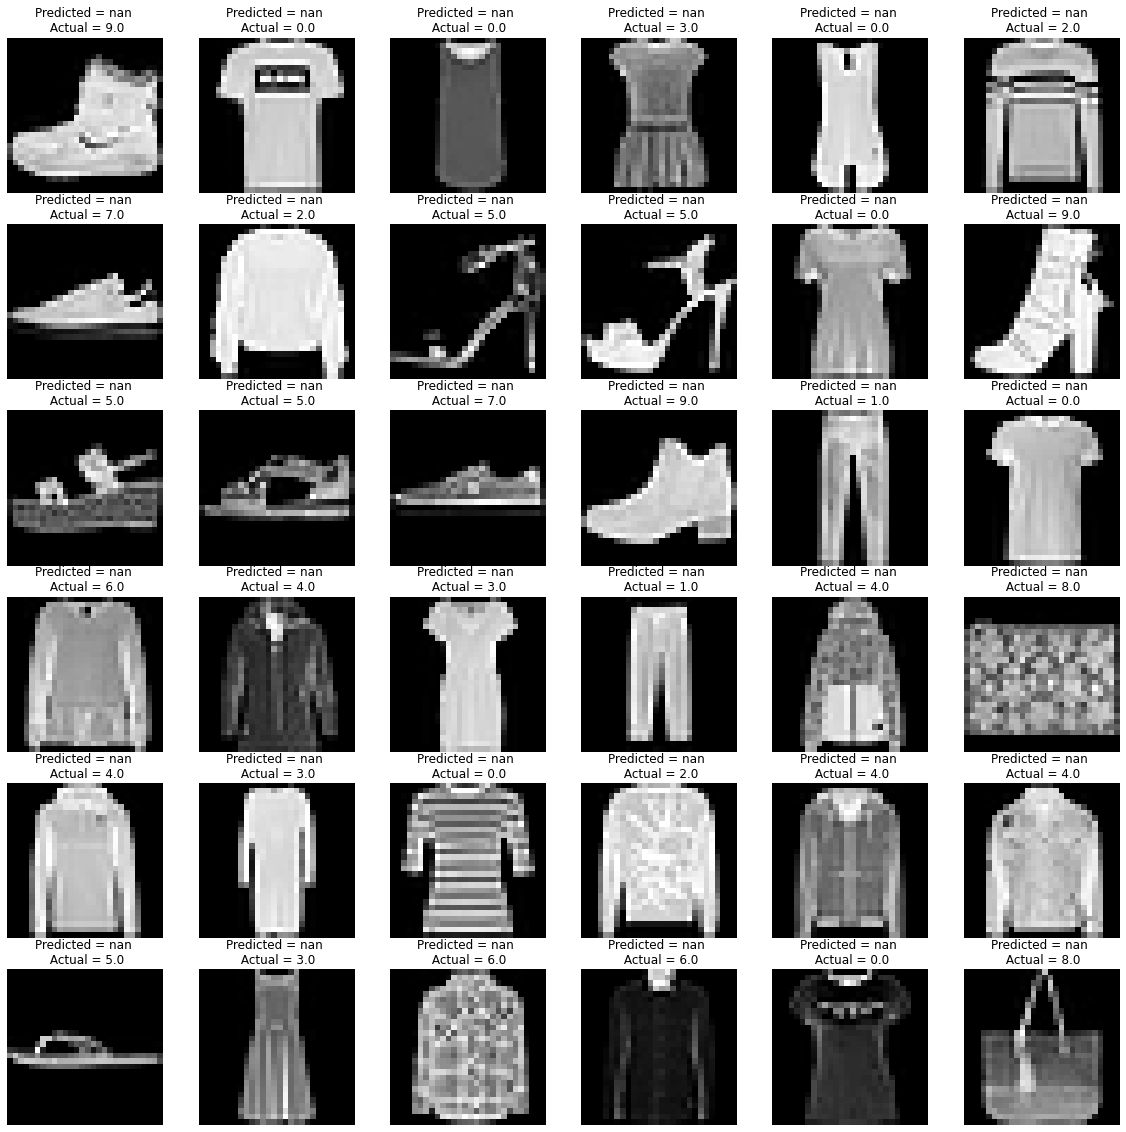

In [5]:
plot_prediction(None,x_train,y_train)

In [6]:
num_classes=10
input_shape = (28, 28, 1)


## Description
We would like to train a two-layer CNN.
-Care must be taken not to overfit the model.

Model0: 
That is the architecture, that you should use in the experiments. (This model in its present form is not useful for solving the problem, i.e it does not learn anything) 

In [7]:
xinput=kl.Input(shape=(input_shape[0],input_shape[1],input_shape[2]))
xconv=kl.Conv2D(24,kernel_size=(3,3),padding='valid')(xinput)

xconv=kl.Conv2D(24,kernel_size=(3,3),padding='valid')(xconv)
x=kl.Flatten()(xconv)
xdense=kl.Dense(num_classes)(x)

In [8]:
model0=km.Model(xinput,xdense)

In [9]:
model0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 24)        5208      
                                                                 
 flatten (Flatten)           (None, 13824)             0         
                                                                 
 dense (Dense)               (None, 10)                138250    
                                                                 
Total params: 143,698
Trainable params: 143,698
Non-trainable params: 0
_________________________________________________________________


In [10]:
opt=tf.keras.optimizers.SGD(learning_rate=.01)
CB=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=PATIENCE_ES),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=PATIENCE_LR)]
model0.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history0=model0.fit(x_train,y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=[x_validation,y_validation],
                    callbacks=CB)




Epoch 1/64
63/63 [==============================] - 18s 248ms/step - loss: 14.4353 - accuracy: 0.1010 - val_loss: 14.5192 - val_accuracy: 0.0992 - lr: 0.0100
Epoch 2/64
63/63 [==============================] - 10s 162ms/step - loss: 14.5425 - accuracy: 0.0978 - val_loss: 14.5192 - val_accuracy: 0.0992 - lr: 0.0100
Epoch 3/64
63/63 [==============================] - 10s 162ms/step - loss: 14.5426 - accuracy: 0.0978 - val_loss: 14.5192 - val_accuracy: 0.0992 - lr: 0.0100
Epoch 4/64
63/63 [==============================] - 10s 162ms/step - loss: 14.5426 - accuracy: 0.0978 - val_loss: 14.5192 - val_accuracy: 0.0992 - lr: 0.0100
Epoch 5/64
63/63 [==============================] - 10s 163ms/step - loss: 14.5426 - accuracy: 0.0978 - val_loss: 14.5192 - val_accuracy: 0.0992 - lr: 0.0100
Epoch 6/64
63/63 [==============================] - 10s 162ms/step - loss: 14.5426 - accuracy: 0.0978 - val_loss: 14.5192 - val_accuracy: 0.0992 - lr: 0.0020
Epoch 7/64
63/63 [==============================] - 

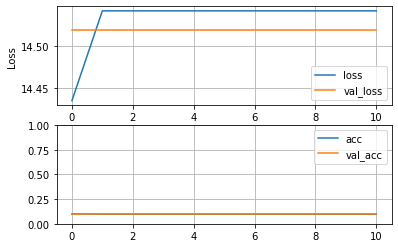

In [11]:
plot_history(history0)



125/125 [==============================] - 1s 11ms/step


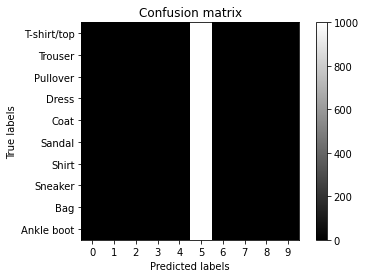

<Figure size 432x288 with 0 Axes>

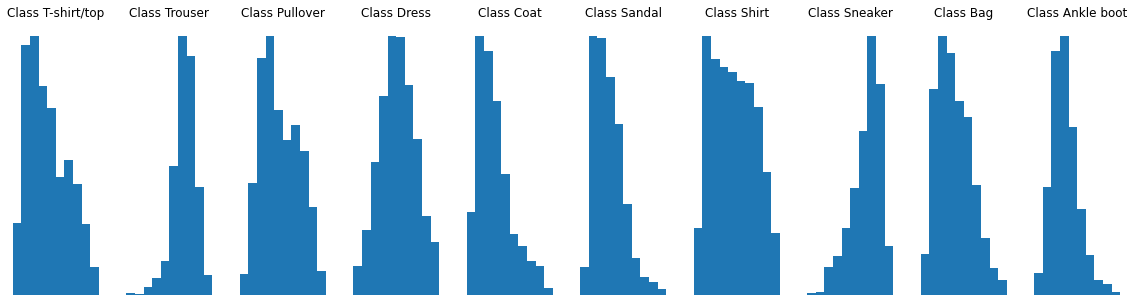

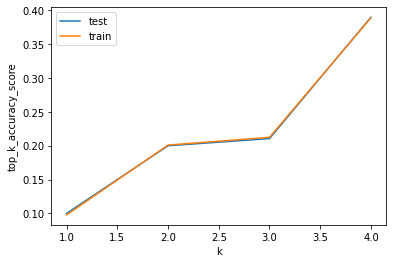

In [12]:
report_model(model0,x_test,y_test,x_train,y_train)


2/2 [==============================] - 0s 8ms/step


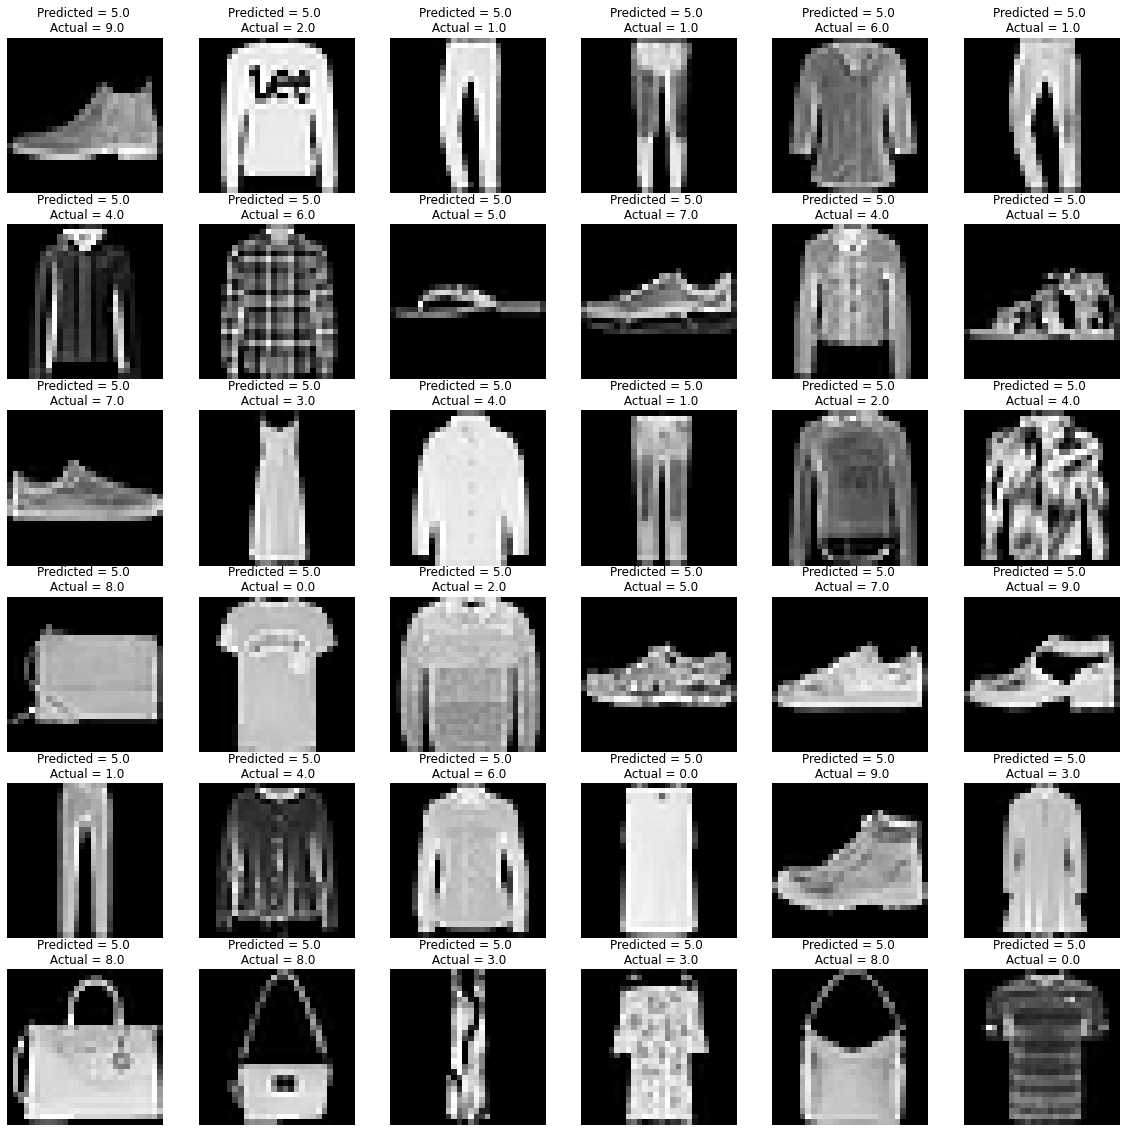

In [13]:
plot_prediction(model0,x_test,y_test)

The previous model does not works!


## Questions:

- Model1:
  - Use adecuate activation function in each layer.
  Is there an improvement in the results? Explain.
  
- Model2:
  - Use other optimizer ADAM with learning_rate=.001
  Is there an improvement in the results? Explain.
  
- Model3:
  - Include Dropout to Last Layer of the Model.
  Is there an improvement in the results? Explain.
  
- Model4:
  - Include BatchNormalization to the Model: 
     - (BN before activation)
     - (Do not use the bias in layers where the BN is applied)
  Is there an improvement in the results? Explain.
  
- Model5:
  - Include Gaussian Noise Layer of the Model (The parameter depends on the range of input values)
  Is there an improvement in the results? Explain.
  
- Model6:
  - Include Dropout all layers to the Model.
  Is there an improvement in the results? Explain.

### Write a conclusion of what did you observe during this practical session.



#### BONUS QUESTIONS:  (The grade will be assigned according to the previous questions and the conclusion below. Extra points will be given, if you solve the following questions.)

- 7. Use another Normalization instead of BatchNormalization.
     Is there an improvement in the results? Explain.

- 8. Is it possible to design a model invariant to additive addition, i.e, a model such that model(x)=model(x+c) for all c and for all x? x is a image, a c is a real number. Implementation and Test of Invariance properties (Plot the norm of || model(x_train+c)-model(x_train)||_2^2). (There are many possible solutions to this problem.)








* SET BIAS TO ZERO BEFORE BN
* CHECK DROPOUT PARAMETERS
* RUN ALL
* WRITE CONCLUSION
* SEND


##Answers

### Model 1 - activations functions

In [14]:
#Solution MODEL1
xinput1=kl.Input(shape=(input_shape[0],input_shape[1],input_shape[2]))

xconv=kl.Conv2D(24,kernel_size=(3,3), activation ='sigmoid',padding='valid')(xinput1)
xconv=kl.Conv2D(24,kernel_size=(3,3), activation ='sigmoid',padding='valid')(xconv)

x=kl.Flatten()(xconv)
xoutput1=kl.Dense(num_classes, activation ='softmax')(x)
model1=km.Model(xinput1,xoutput1)

In [15]:
opt=tf.keras.optimizers.SGD(learning_rate=.01)
CB=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=PATIENCE_ES),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=PATIENCE_LR)]

model1.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=model1.fit(x_train,y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_validation,y_validation),
                    callbacks=CB)


Epoch 1/64
63/63 [==============================] - 12s 190ms/step - loss: 2.5025 - accuracy: 0.2795 - val_loss: 1.3210 - val_accuracy: 0.5594 - lr: 0.0100
Epoch 2/64
63/63 [==============================] - 12s 186ms/step - loss: 1.0658 - accuracy: 0.6485 - val_loss: 1.0746 - val_accuracy: 0.6964 - lr: 0.0100
Epoch 3/64
63/63 [==============================] - 12s 186ms/step - loss: 0.8070 - accuracy: 0.7243 - val_loss: 0.7644 - val_accuracy: 0.7254 - lr: 0.0100
Epoch 4/64
63/63 [==============================] - 12s 187ms/step - loss: 0.6982 - accuracy: 0.7542 - val_loss: 0.7005 - val_accuracy: 0.7472 - lr: 0.0100
Epoch 5/64
63/63 [==============================] - 12s 187ms/step - loss: 0.6603 - accuracy: 0.7630 - val_loss: 0.7138 - val_accuracy: 0.7535 - lr: 0.0100
Epoch 6/64
63/63 [==============================] - 12s 187ms/step - loss: 0.6159 - accuracy: 0.7812 - val_loss: 0.7024 - val_accuracy: 0.7590 - lr: 0.0100
Epoch 7/64
63/63 [==============================] - 12s 186ms/st

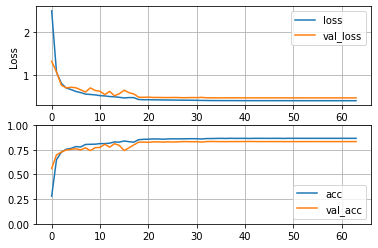

125/125 [==============================] - 2s 13ms/step


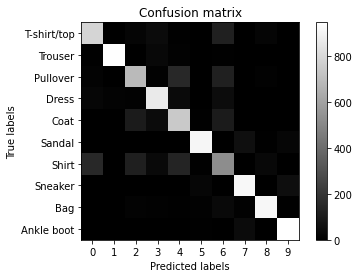

<Figure size 432x288 with 0 Axes>

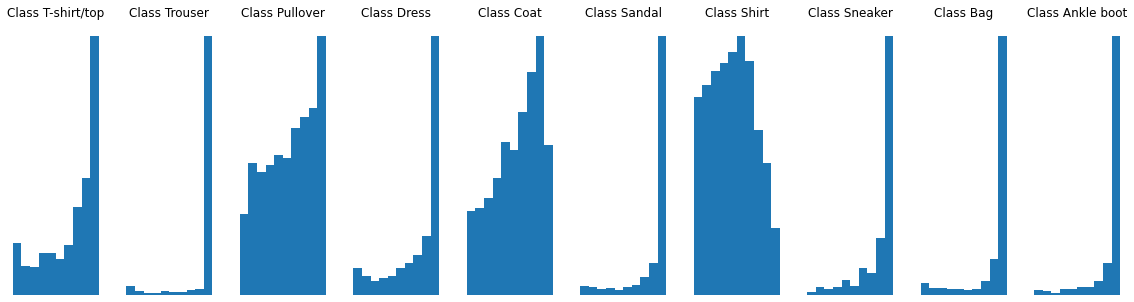

2/2 [==============================] - 0s 9ms/step


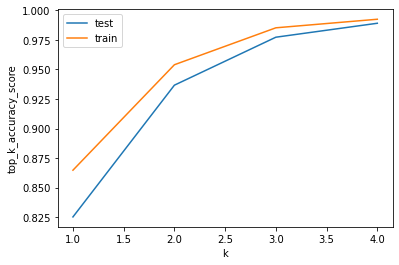

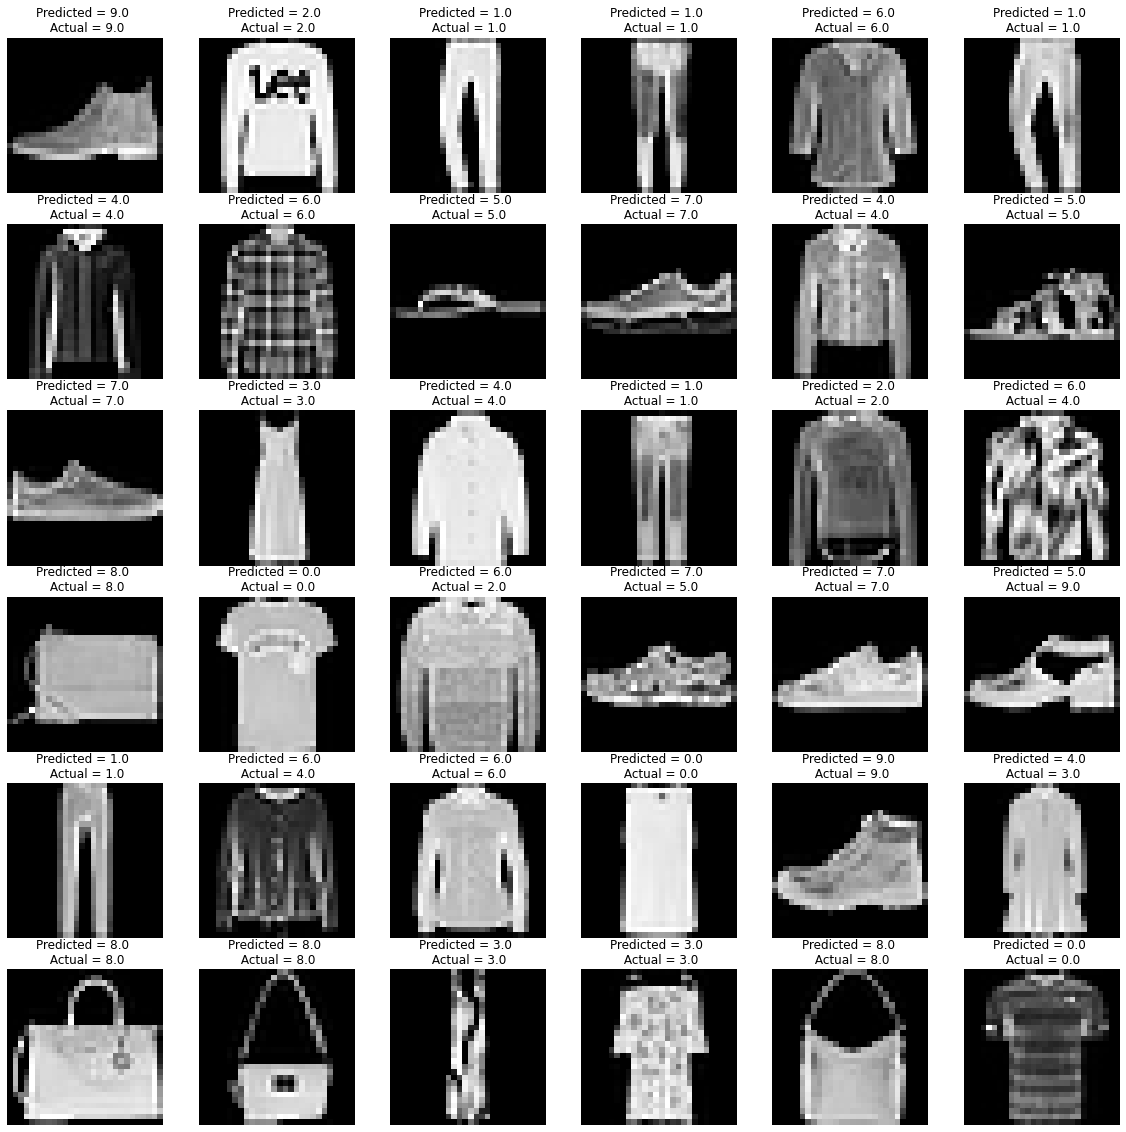

In [16]:
plot_history(history1)
report_model(model1,x_test,y_test,x_train,y_train)
plot_prediction(model1,x_test,y_test)

The base model was not complete and simply adding a sigmoid activation fonction in the layers and a softmax in the output (because we are doing multi class classification) in the output was enought to reduce the loss and increase the accuracy.













### Model 2 - optimizer Adam

In [17]:
xinput2=kl.Input(shape=(input_shape[0],input_shape[1],input_shape[2]))

xconv=kl.Conv2D(24,kernel_size=(3,3), activation ='sigmoid',padding='valid')(xinput1)
xconv=kl.Conv2D(24,kernel_size=(3,3), activation ='sigmoid',padding='valid')(xconv)

x=kl.Flatten()(xconv)
xoutput2=kl.Dense(num_classes, activation ='softmax')(x)
model2=km.Model(xinput1,xoutput2)

In [18]:
opt=tf.keras.optimizers.Adam(learning_rate=.001)
CB=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=PATIENCE_ES),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=PATIENCE_LR)]
model2.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history2=model2.fit(x_train,y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_validation,y_validation),
                    callbacks=CB)

Epoch 1/64
63/63 [==============================] - 12s 190ms/step - loss: 3.2024 - accuracy: 0.2348 - val_loss: 1.5756 - val_accuracy: 0.5608 - lr: 0.0010
Epoch 2/64
63/63 [==============================] - 13s 214ms/step - loss: 0.9615 - accuracy: 0.6913 - val_loss: 0.7215 - val_accuracy: 0.7297 - lr: 0.0010
Epoch 3/64
63/63 [==============================] - 12s 187ms/step - loss: 0.6423 - accuracy: 0.7602 - val_loss: 0.6264 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 4/64
63/63 [==============================] - 12s 187ms/step - loss: 0.5824 - accuracy: 0.7843 - val_loss: 0.5783 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 5/64
63/63 [==============================] - 12s 189ms/step - loss: 0.5365 - accuracy: 0.8000 - val_loss: 0.5197 - val_accuracy: 0.8061 - lr: 0.0010
Epoch 6/64
63/63 [==============================] - 12s 188ms/step - loss: 0.4965 - accuracy: 0.8230 - val_loss: 0.5236 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 7/64
63/63 [==============================] - 12s 189ms/st

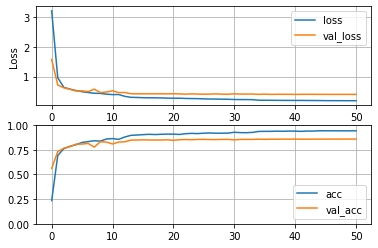

125/125 [==============================] - 2s 14ms/step


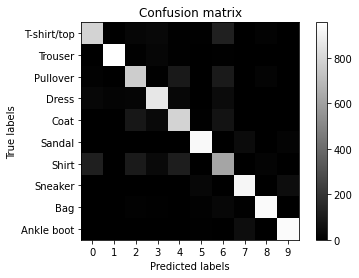

<Figure size 432x288 with 0 Axes>

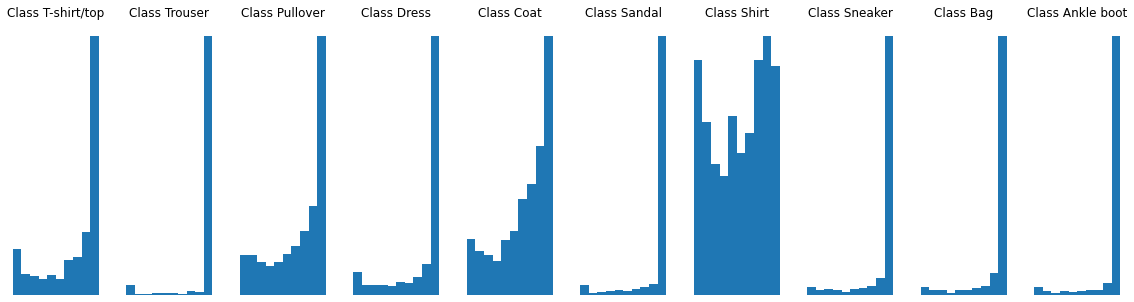

2/2 [==============================] - 0s 8ms/step


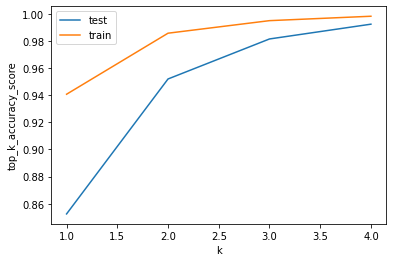

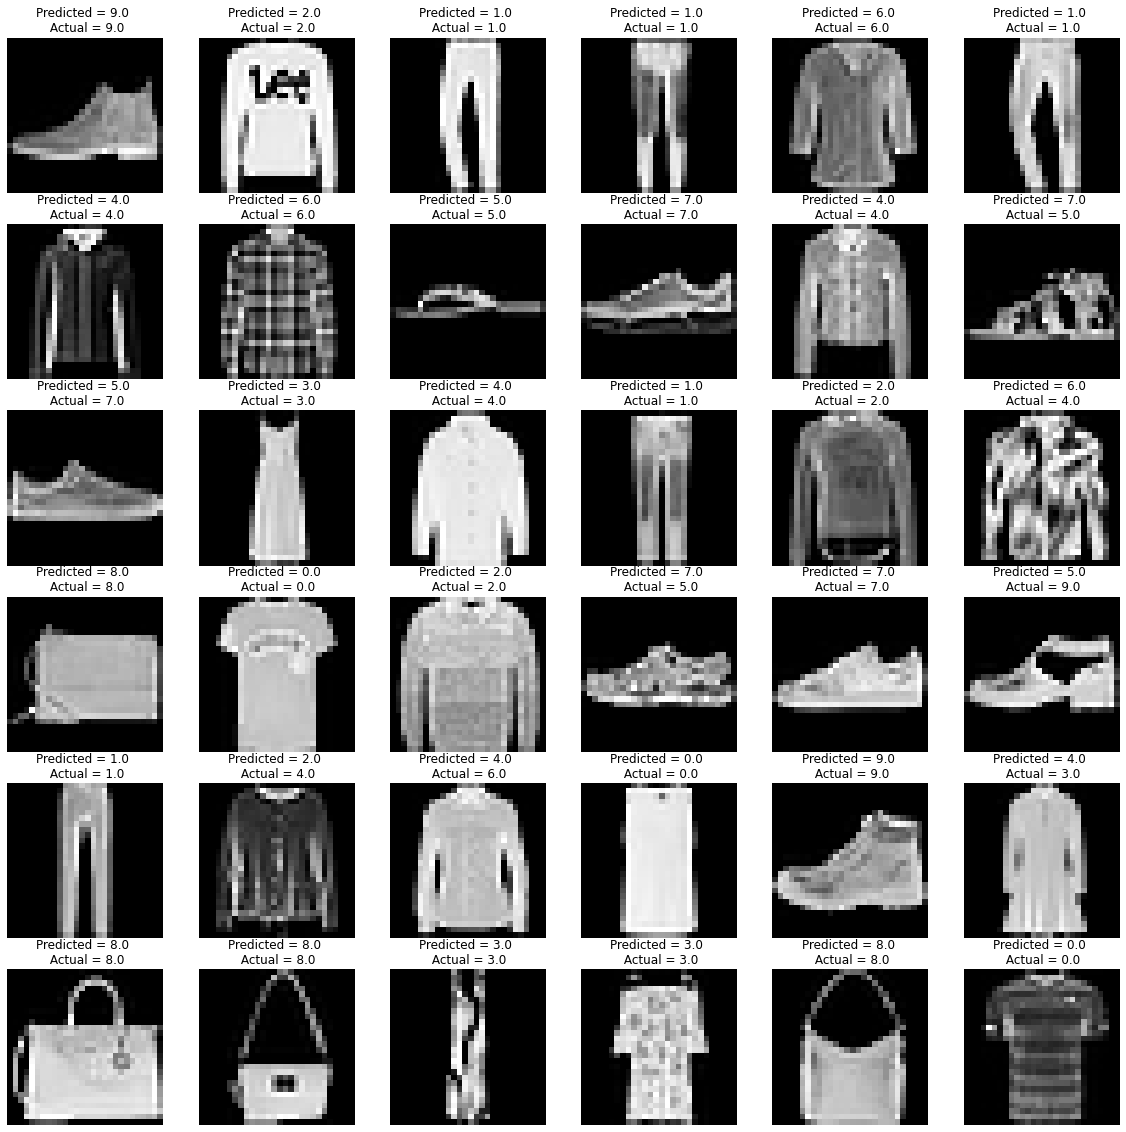

In [19]:
plot_history(history2)
report_model(model2,x_test,y_test,x_train,y_train)
plot_prediction(model2,x_test,y_test)

The adam optimizer enable the model to define a strategy to update the weights to aim at reducing the loss and provide the most accurate results possible.

### Model 3 - DropOut on last layer

In [20]:
xinput3=kl.Input(shape=(input_shape[0],input_shape[1],input_shape[2]))

xconv=kl.Conv2D(24,kernel_size=(3,3), activation ='sigmoid',padding='valid')(xinput3)
xconv=kl.Conv2D(24,kernel_size=(3,3), activation ='sigmoid',padding='valid')(xconv)

x=kl.Flatten()(xconv)
xdropout=kl.Dropout(0.5)(x)
xoutput3=kl.Dense(num_classes, activation ='softmax')(xdropout)
model3=km.Model(xinput3,xoutput3)

In [21]:
opt=tf.keras.optimizers.Adam(learning_rate=.001)
CB=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=PATIENCE_ES),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=PATIENCE_LR)]
model3.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history3=model3.fit(x_train,y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_validation,y_validation),
                    callbacks=CB)

Epoch 1/64
63/63 [==============================] - 13s 201ms/step - loss: 2.2606 - accuracy: 0.3575 - val_loss: 0.9221 - val_accuracy: 0.6224 - lr: 0.0010
Epoch 2/64
63/63 [==============================] - 12s 198ms/step - loss: 0.7467 - accuracy: 0.7197 - val_loss: 0.6453 - val_accuracy: 0.7531 - lr: 0.0010
Epoch 3/64
63/63 [==============================] - 12s 198ms/step - loss: 0.6508 - accuracy: 0.7605 - val_loss: 0.5864 - val_accuracy: 0.7771 - lr: 0.0010
Epoch 4/64
63/63 [==============================] - 12s 198ms/step - loss: 0.5669 - accuracy: 0.7952 - val_loss: 0.5234 - val_accuracy: 0.8034 - lr: 0.0010
Epoch 5/64
63/63 [==============================] - 12s 198ms/step - loss: 0.5164 - accuracy: 0.8135 - val_loss: 0.5014 - val_accuracy: 0.8149 - lr: 0.0010
Epoch 6/64
63/63 [==============================] - 13s 204ms/step - loss: 0.4920 - accuracy: 0.8242 - val_loss: 0.4991 - val_accuracy: 0.8150 - lr: 0.0010
Epoch 7/64
63/63 [==============================] - 13s 213ms/st

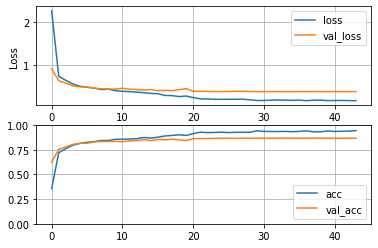

125/125 [==============================] - 2s 13ms/step


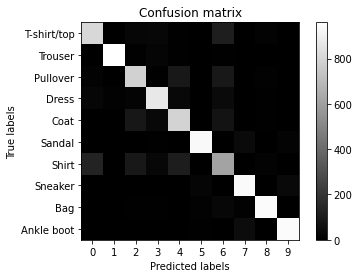

<Figure size 432x288 with 0 Axes>

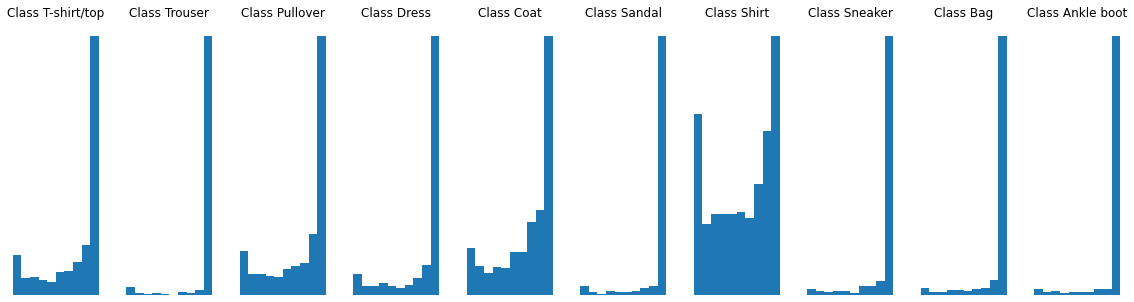

2/2 [==============================] - 0s 12ms/step


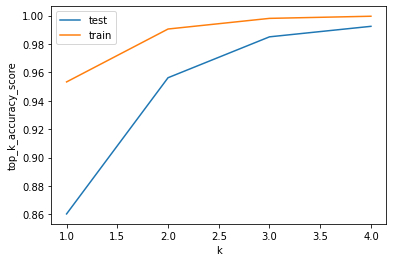

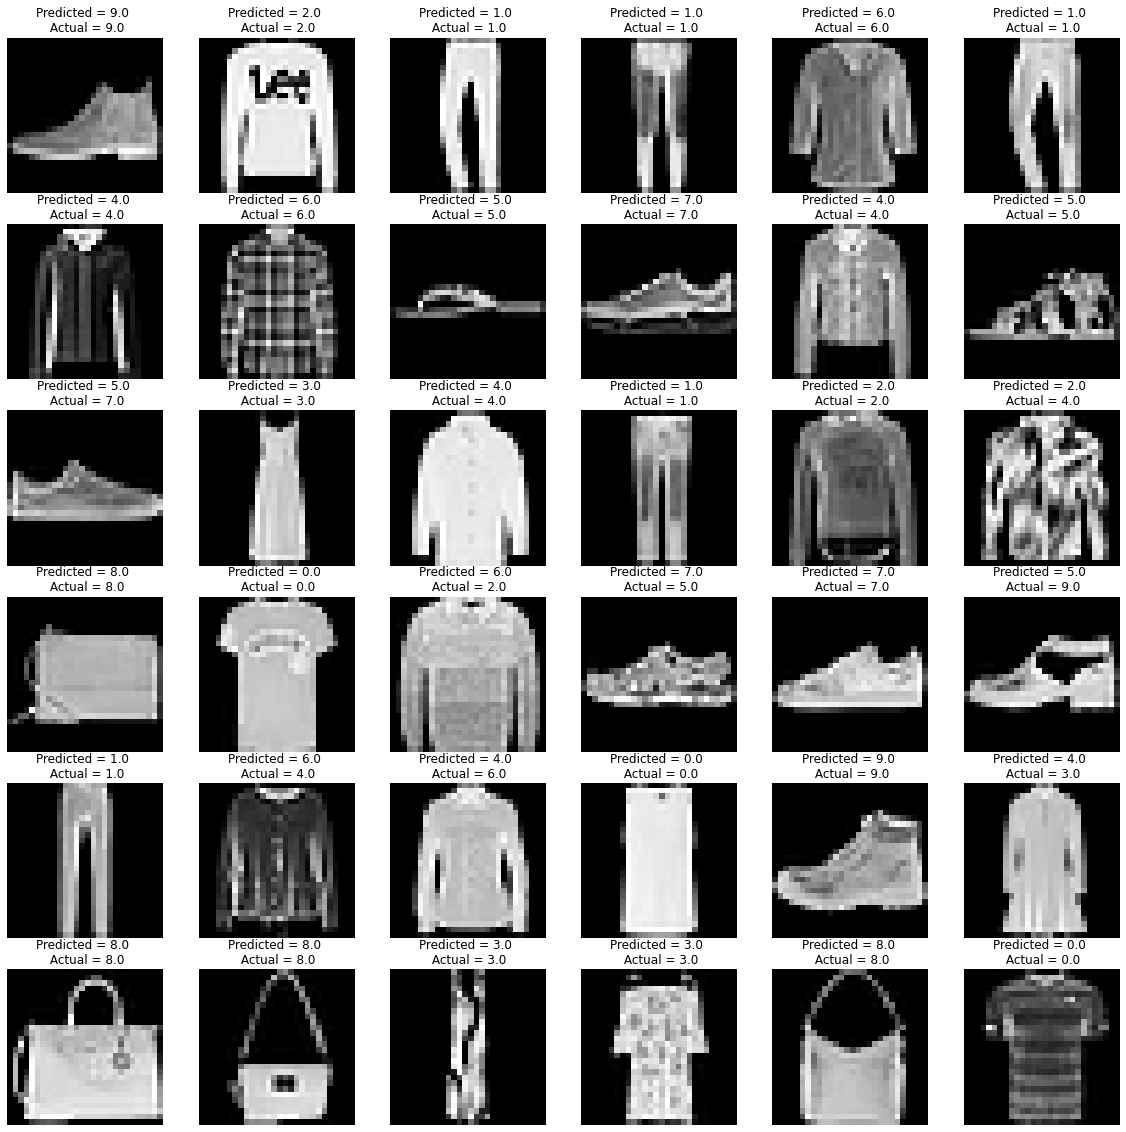

In [22]:
plot_history(history3)
report_model(model3,x_test,y_test,x_train,y_train)
plot_prediction(model3,x_test,y_test)

The dropout layer randomly sets some weights to zero during training to avoid overfitting. In our case dropout did not really improve the performance of our model may be because we have a relatively large amount of training data

###Model 4 - BatchNormalisation

In [23]:
xinput4=kl.Input(shape=(input_shape[0],input_shape[1],input_shape[2]))

BN = kl.BatchNormalization()(xinput4)
xconv=kl.Conv2D(24,kernel_size=(3,3), padding='valid', bias_initializer='zeros')(BN)
act1 = tf.keras.activations.sigmoid(xconv)

BN = kl.BatchNormalization()(act1)
xconv=kl.Conv2D(24,kernel_size=(3,3), padding='valid', bias_initializer='zeros')(BN)
act2 = tf.keras.activations.sigmoid(xconv)

x=kl.Flatten()(act2)
xdropout=kl.Dropout(0.5)(x)
xoutput4=kl.Dense(num_classes, activation ='softmax')(xdropout)
model4=km.Model(xinput4,xoutput4)

In [24]:
opt=tf.keras.optimizers.Adam(learning_rate=.001)
CB=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=PATIENCE_ES),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=PATIENCE_LR)]
model4.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history4=model4.fit(x_train,y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_validation,y_validation),
                    callbacks=CB)

Epoch 1/64
63/63 [==============================] - 15s 225ms/step - loss: 2.0830 - accuracy: 0.5060 - val_loss: 2.7163 - val_accuracy: 0.2637 - lr: 0.0010
Epoch 2/64
63/63 [==============================] - 14s 220ms/step - loss: 0.8335 - accuracy: 0.7268 - val_loss: 1.5725 - val_accuracy: 0.4195 - lr: 0.0010
Epoch 3/64
63/63 [==============================] - 14s 221ms/step - loss: 0.7387 - accuracy: 0.7600 - val_loss: 2.0294 - val_accuracy: 0.3531 - lr: 0.0010
Epoch 4/64
63/63 [==============================] - 14s 220ms/step - loss: 0.6443 - accuracy: 0.7843 - val_loss: 1.1757 - val_accuracy: 0.5677 - lr: 0.0010
Epoch 5/64
63/63 [==============================] - 14s 222ms/step - loss: 0.6000 - accuracy: 0.8060 - val_loss: 0.8697 - val_accuracy: 0.6608 - lr: 0.0010
Epoch 6/64
63/63 [==============================] - 14s 222ms/step - loss: 0.5265 - accuracy: 0.8198 - val_loss: 0.7531 - val_accuracy: 0.7534 - lr: 0.0010
Epoch 7/64
63/63 [==============================] - 15s 244ms/st

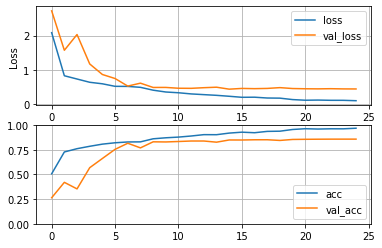

125/125 [==============================] - 2s 15ms/step


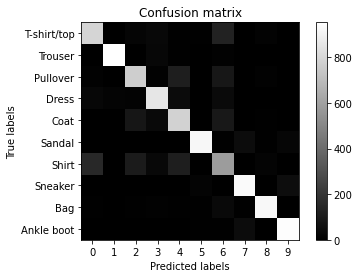

<Figure size 432x288 with 0 Axes>

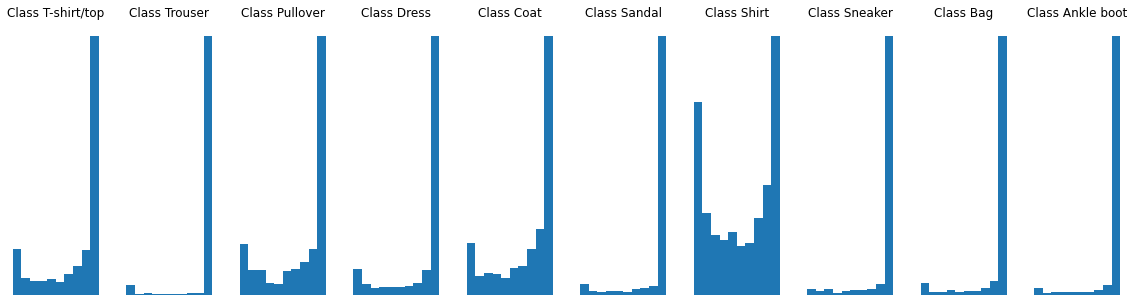

2/2 [==============================] - 0s 11ms/step


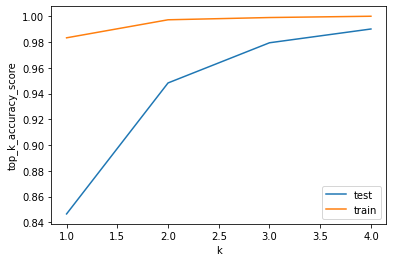

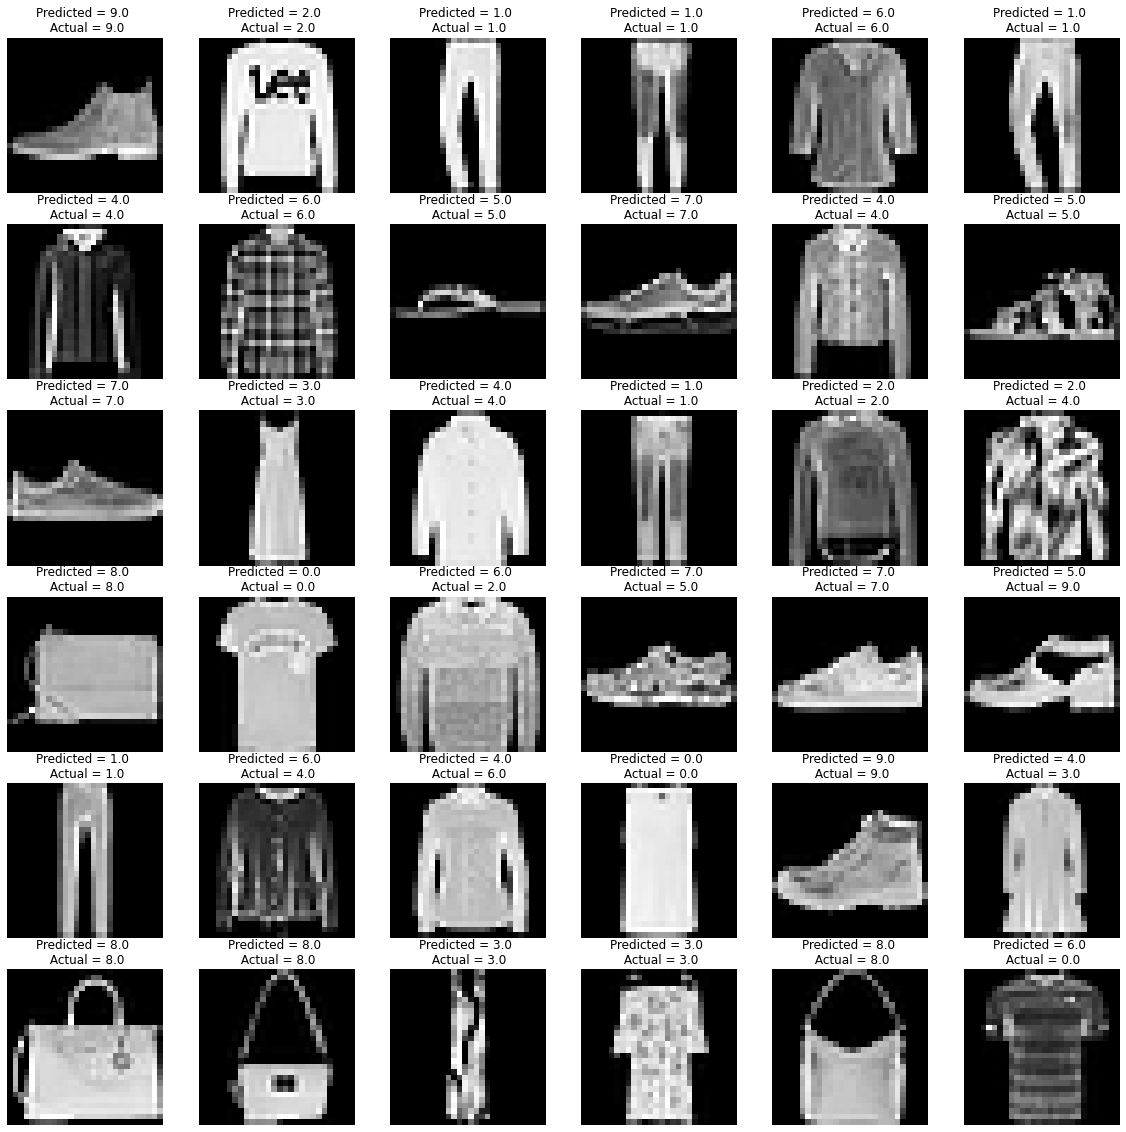

In [25]:
plot_history(history4)
report_model(model4,x_test,y_test,x_train,y_train)
plot_prediction(model4,x_test,y_test)

Adding batch normalization **decreases** the loss of the model by normalizing the contribution to a layer for every mini batch. The batch normalization improves our model's loss and accuracy.

###Model 5 - Gaussian noise Layer

In [26]:
xinput5=kl.Input(shape=(input_shape[0],input_shape[1],input_shape[2]))
GN = kl.GaussianNoise(0.1)(xinput5)

BN = kl.BatchNormalization()(GN)
xconv=kl.Conv2D(24,kernel_size=(3,3), padding='valid', bias_initializer='zeros')(BN)
act1 = tf.keras.activations.sigmoid(xconv)

BN = kl.BatchNormalization()(act1)
xconv=kl.Conv2D(24,kernel_size=(3,3), padding='valid', bias_initializer='zeros')(BN)
act2 = tf.keras.activations.sigmoid(xconv)

x=kl.Flatten()(act2)
xdropout=kl.Dropout(0.3)(x)
xoutput5=kl.Dense(num_classes, activation ='softmax')(xdropout)
model5=km.Model(xinput5,xoutput5)

In [27]:
opt=tf.keras.optimizers.Adam(learning_rate=.001)
CB=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=PATIENCE_ES),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=PATIENCE_LR)]
model5.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history5=model5.fit(x_train,y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_validation,y_validation),
                    callbacks=CB)

Epoch 1/64
63/63 [==============================] - 25s 375ms/step - loss: 1.8413 - accuracy: 0.5440 - val_loss: 3.2980 - val_accuracy: 0.1874 - lr: 0.0010
Epoch 2/64
63/63 [==============================] - 14s 221ms/step - loss: 0.7299 - accuracy: 0.7475 - val_loss: 3.0420 - val_accuracy: 0.1824 - lr: 0.0010
Epoch 3/64
63/63 [==============================] - 14s 221ms/step - loss: 0.6585 - accuracy: 0.7843 - val_loss: 1.2880 - val_accuracy: 0.5367 - lr: 0.0010
Epoch 4/64
63/63 [==============================] - 14s 222ms/step - loss: 0.6035 - accuracy: 0.7972 - val_loss: 1.6691 - val_accuracy: 0.3968 - lr: 0.0010
Epoch 5/64
63/63 [==============================] - 14s 222ms/step - loss: 0.5310 - accuracy: 0.8205 - val_loss: 0.7762 - val_accuracy: 0.7321 - lr: 0.0010
Epoch 6/64
63/63 [==============================] - 14s 223ms/step - loss: 0.5261 - accuracy: 0.8173 - val_loss: 0.6860 - val_accuracy: 0.7586 - lr: 0.0010
Epoch 7/64
63/63 [==============================] - 16s 251ms/st

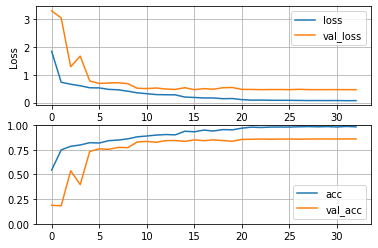

125/125 [==============================] - 2s 14ms/step


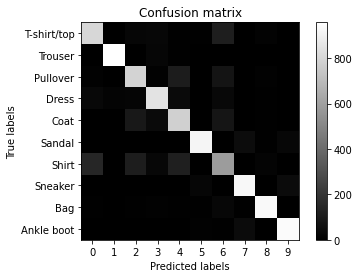

<Figure size 432x288 with 0 Axes>

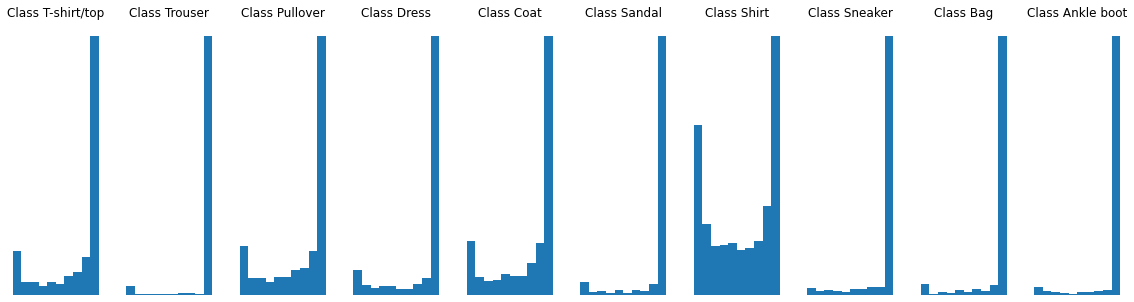

2/2 [==============================] - 0s 9ms/step


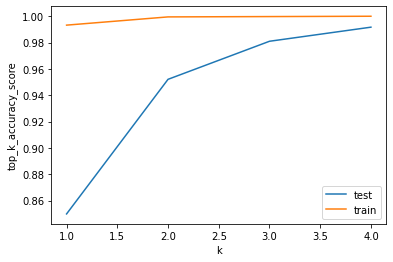

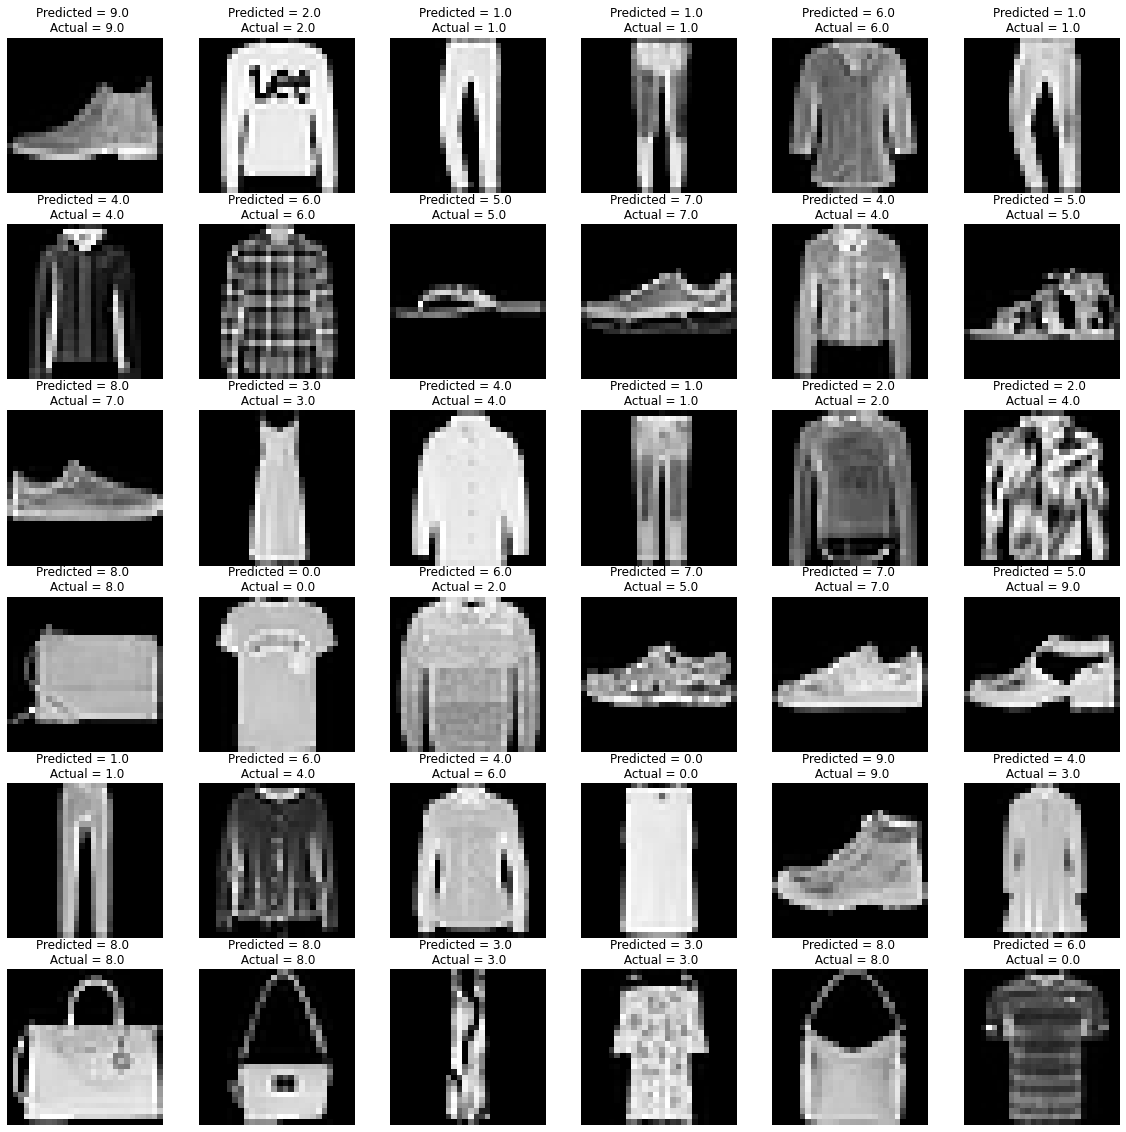

In [28]:
plot_history(history5)
report_model(model5,x_test,y_test,x_train,y_train)
plot_prediction(model5,x_test,y_test)

Adding Gaussian noise at the beginning of the model adds some regularization and reduces overfitting. The gaussian noise layer greatly improves the performance of our model on the test set but not on the validation set. 



###Model 6 - DropOut to all layers

In [44]:
xinput6=kl.Input(shape=(input_shape[0],input_shape[1],input_shape[2]))
GN = kl.GaussianNoise(0.1)(xinput6)

xdropout=kl.Dropout(0.1)(GN)
BN = kl.BatchNormalization()(xdropout)
xconv=kl.Conv2D(24,kernel_size=(3,3), padding='valid', bias_initializer='zeros')(BN)
act1 = tf.keras.activations.sigmoid(xconv)

xdropout=kl.Dropout(0.1)(act1)
BN = kl.BatchNormalization()(xdropout)
xconv=kl.Conv2D(24,kernel_size=(3,3), padding='valid', bias_initializer='zeros')(BN)
act2 = tf.keras.activations.sigmoid(xconv)

x=kl.Flatten()(act2)
xdropout=kl.Dropout(0.5)(x)
xoutput6=kl.Dense(num_classes, activation ='softmax')(xdropout)
model6=km.Model(xinput6,xoutput6)

In [45]:
opt=tf.keras.optimizers.Adam(learning_rate=.001)
CB=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=PATIENCE_ES),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=PATIENCE_LR)]
model6.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history6=model6.fit(x_train,y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_validation,y_validation),
                    callbacks=CB)

Epoch 1/64
63/63 [==============================] - 15s 236ms/step - loss: 2.4330 - accuracy: 0.3792 - val_loss: 1.5177 - val_accuracy: 0.4591 - lr: 0.0010
Epoch 2/64
63/63 [==============================] - 15s 234ms/step - loss: 0.9788 - accuracy: 0.6685 - val_loss: 1.2844 - val_accuracy: 0.5513 - lr: 0.0010
Epoch 3/64
63/63 [==============================] - 15s 234ms/step - loss: 0.8813 - accuracy: 0.7045 - val_loss: 0.9262 - val_accuracy: 0.6431 - lr: 0.0010
Epoch 4/64
63/63 [==============================] - 15s 234ms/step - loss: 0.7840 - accuracy: 0.7485 - val_loss: 1.3272 - val_accuracy: 0.5861 - lr: 0.0010
Epoch 5/64
63/63 [==============================] - 15s 233ms/step - loss: 0.7538 - accuracy: 0.7448 - val_loss: 0.6073 - val_accuracy: 0.7753 - lr: 0.0010
Epoch 6/64
63/63 [==============================] - 15s 235ms/step - loss: 0.7450 - accuracy: 0.7567 - val_loss: 0.7047 - val_accuracy: 0.7566 - lr: 0.0010
Epoch 7/64
63/63 [==============================] - 16s 252ms/st

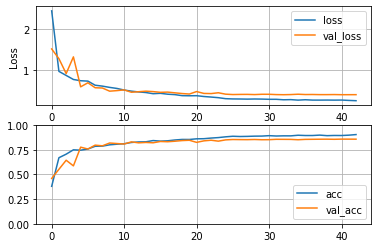

125/125 [==============================] - 2s 15ms/step


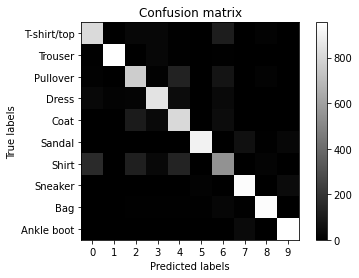

<Figure size 432x288 with 0 Axes>

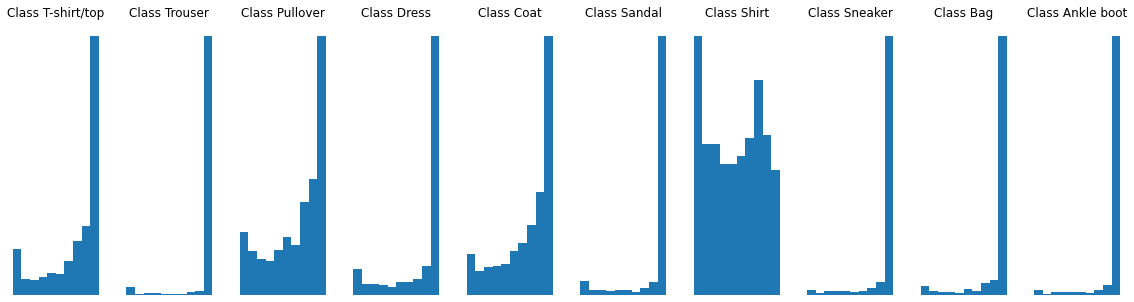

2/2 [==============================] - 0s 10ms/step


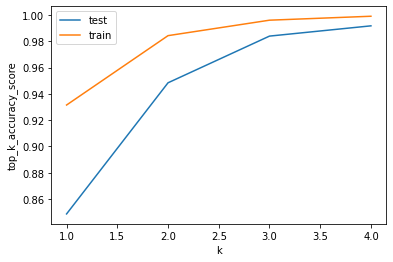

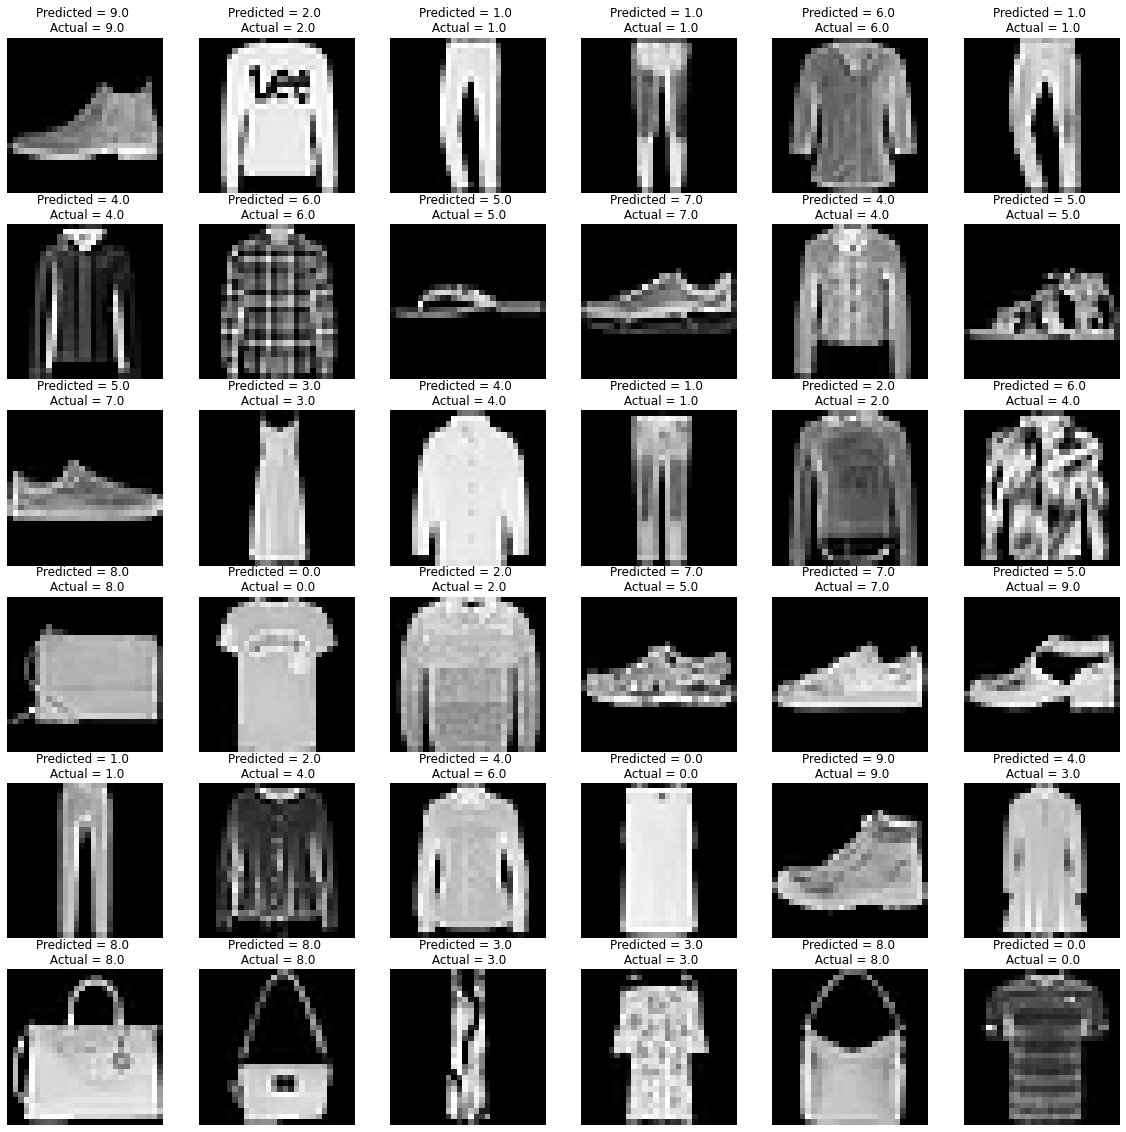

In [46]:
plot_history(history6)
report_model(model6,x_test,y_test,x_train,y_train)
plot_prediction(model6,x_test,y_test)

Adding dropout in all the layers did not improve the performance of the model neither on test nor on the validation set.

###Model 7 - Layer Normalization (Bonus question)

In [48]:
xinput7=kl.Input(shape=(input_shape[0],input_shape[1],input_shape[2]))
GN = kl.GaussianNoise(0.1)(xinput7)

xdropout=kl.Dropout(0.1)(GN)
LN = kl.LayerNormalization()(xdropout)
xconv=kl.Conv2D(24,kernel_size=(3,3), padding='valid', bias_initializer='zeros')(LN)
act1 = tf.keras.activations.sigmoid(xconv)

xdropout=kl.Dropout(0.1)(act1)
LN = kl.LayerNormalization()(xdropout)
xconv=kl.Conv2D(24,kernel_size=(3,3), padding='valid', bias_initializer='zeros')(LN)
act2 = tf.keras.activations.sigmoid(xconv)

x=kl.Flatten()(act2)
xdropout=kl.Dropout(0.5)(x)
xoutput7=kl.Dense(num_classes, activation ='softmax')(xdropout)
model7=km.Model(xinput7,xoutput7)

In [49]:
opt=tf.keras.optimizers.Adam(learning_rate=.001)
CB=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=PATIENCE_ES),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=PATIENCE_LR)]
model7.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history7=model7.fit(x_train,y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_validation,y_validation),
                    callbacks=CB)

Epoch 1/64
63/63 [==============================] - 21s 327ms/step - loss: 3.5311 - accuracy: 0.1002 - val_loss: 2.3909 - val_accuracy: 0.1010 - lr: 0.0010
Epoch 2/64
63/63 [==============================] - 20s 321ms/step - loss: 2.5149 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.0989 - lr: 0.0010
Epoch 3/64
63/63 [==============================] - 20s 320ms/step - loss: 2.3133 - accuracy: 0.1053 - val_loss: 2.3026 - val_accuracy: 0.0989 - lr: 0.0010
Epoch 4/64
63/63 [==============================] - 20s 321ms/step - loss: 2.3068 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.0979 - lr: 0.0010
Epoch 5/64
63/63 [==============================] - 20s 320ms/step - loss: 2.3051 - accuracy: 0.0960 - val_loss: 2.3026 - val_accuracy: 0.1002 - lr: 0.0010
Epoch 6/64
63/63 [==============================] - 20s 320ms/step - loss: 2.3032 - accuracy: 0.1050 - val_loss: 2.3026 - val_accuracy: 0.1002 - lr: 0.0010
Epoch 7/64
63/63 [==============================] - 20s 321ms/st

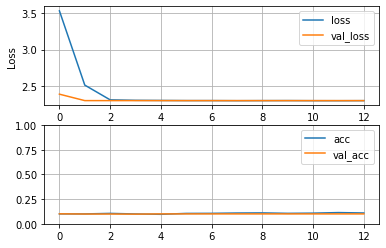

125/125 [==============================] - 3s 22ms/step


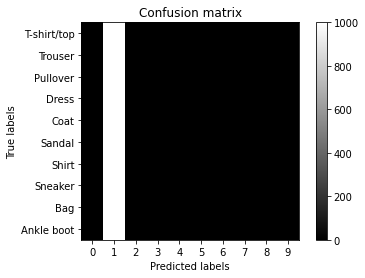

<Figure size 432x288 with 0 Axes>

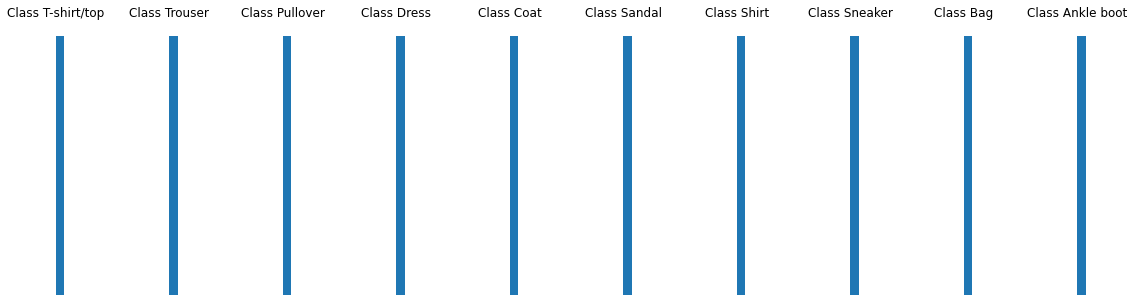

2/2 [==============================] - 0s 10ms/step


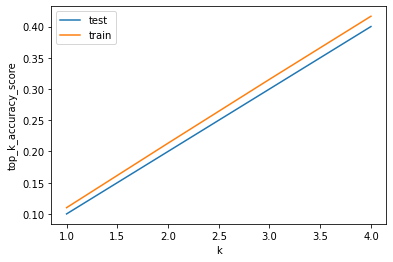

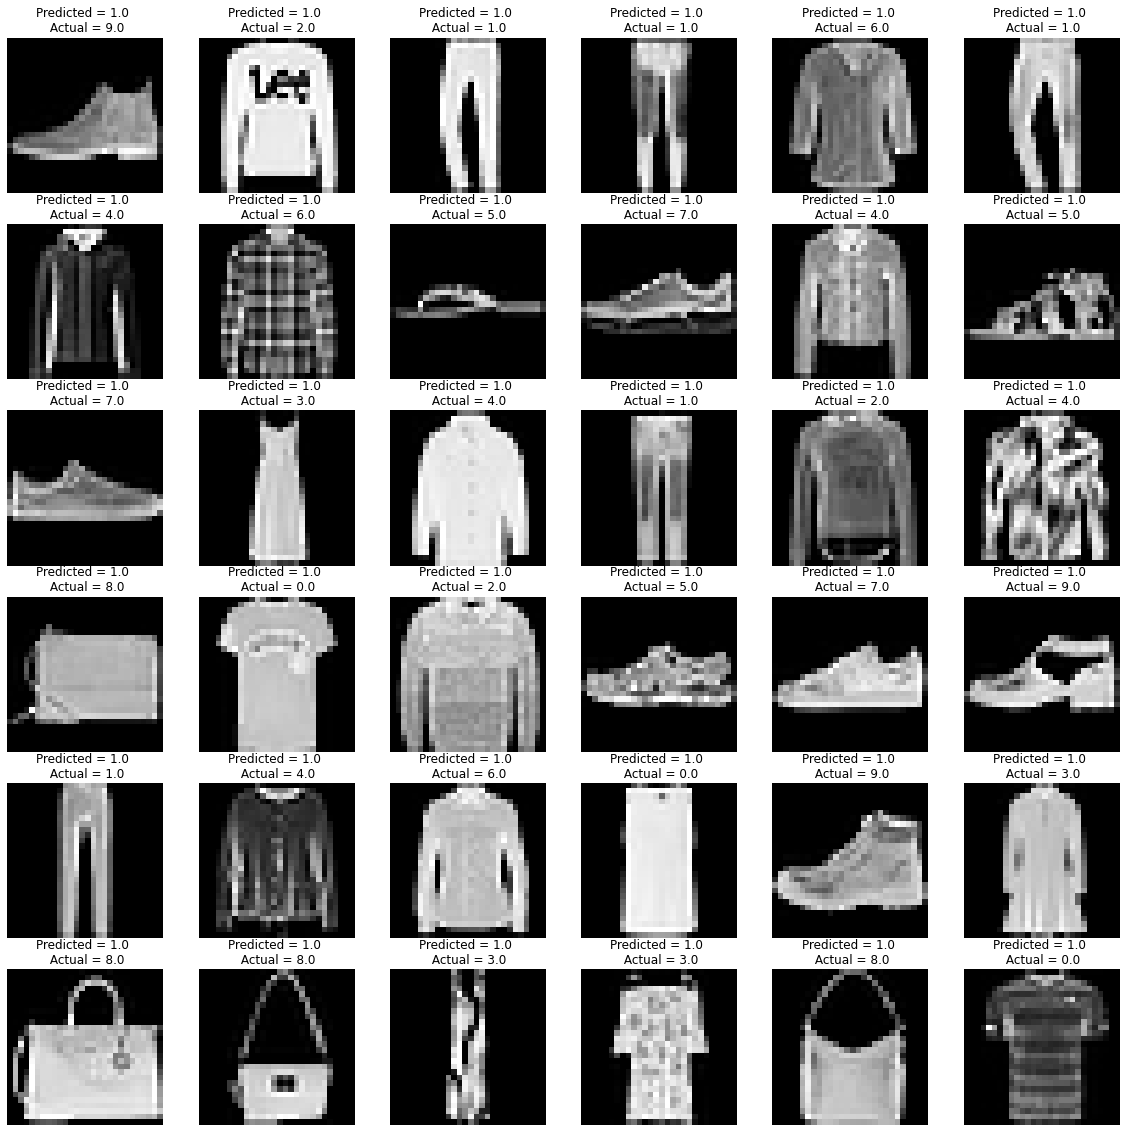

In [50]:
plot_history(history7)
report_model(model7,x_test,y_test,x_train,y_train)
plot_prediction(model7,x_test,y_test)

Adding Layer Normalization did not improve the performance of the model neither on test nor on the validation set.

### Comparing the trained models

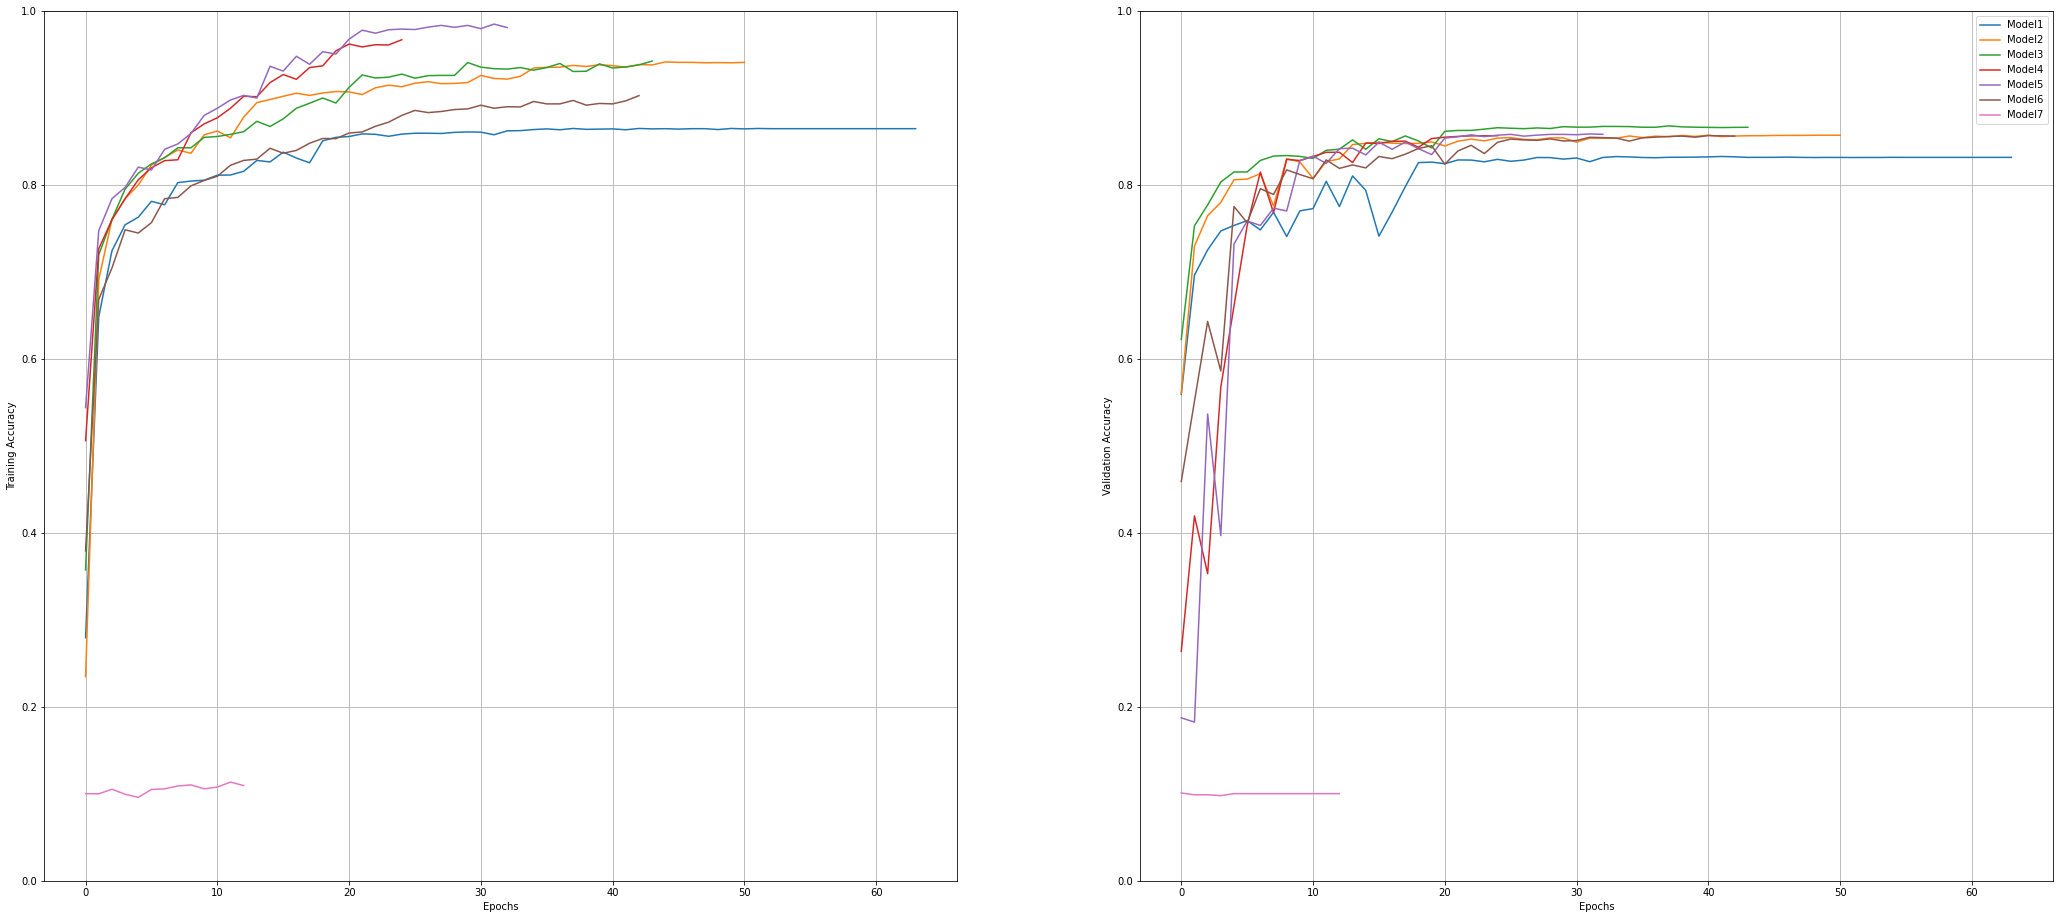

In [51]:
plt.figure(figsize=(36,16))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'],label='Model1')
plt.plot(history2.history['accuracy'],label='Model2')
plt.plot(history3.history['accuracy'],label='Model3')
plt.plot(history4.history['accuracy'],label='Model4')
plt.plot(history5.history['accuracy'],label='Model5')
plt.plot(history6.history['accuracy'],label='Model6')
plt.plot(history7.history['accuracy'],label='Model7')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.ylim([0,1])
plt.grid()
plt.subplot(1,2,2)
plt.plot(history1.history['val_accuracy'],label='Model1')
plt.plot(history2.history['val_accuracy'],label='Model2')
plt.plot(history3.history['val_accuracy'],label='Model3')
plt.plot(history4.history['val_accuracy'],label='Model4')
plt.plot(history5.history['val_accuracy'],label='Model5')
plt.plot(history6.history['val_accuracy'],label='Model6')
plt.plot(history7.history['val_accuracy'],label='Model7')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.ylim([0,1])
plt.grid()
plt.legend()
plt.show()

###Conclusion

* The model 0 was incomplete since it had no activation fonction that is why it had a very poor performance. 
* Adding an optimizer such as adam on a simple neural network enables it to establish a strategy to have the bst possible accuracy thereby achieving a very good performance.
* Adding drop out on the last layer made the model achieve the best performance on the validation set. In fact model 3 is the best model so far. 
*  Model 4 and 5 achieve a performance very close to the best, I guess it's possible to tune the parameters of the Batch normalization and gaussian noise layer through a grid search to find the best hyperparameters and improve their performance.
* It's not a good idea to add Layer normalization to a 2 layers CNN.  